In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import Cdf
import Pmf
import warnings
warnings.filterwarnings('ignore')

%pylab inline
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [7]:
total_bandwidth=12.5

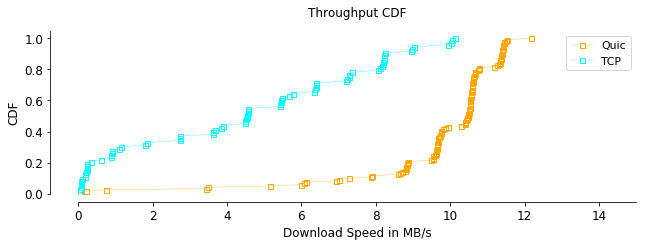

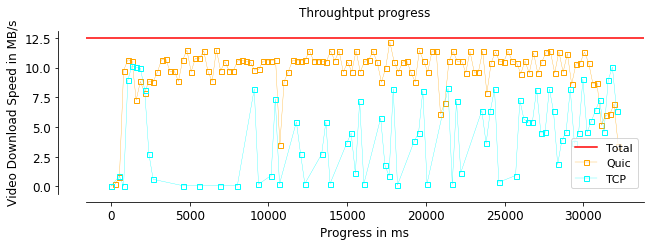

In [8]:
quic_throughput = "/home/rohit/Quic/throughput_youtube/1QUIC/Q044_throughput.csv"
tcp_throughput = "/home/rohit/Quic/throughput_youtube/1TCP/throughput_1TCP.csv"

quic_t =  pd.read_csv(quic_throughput,',')
tcp_t = pd.read_csv(tcp_throughput, ',')

quic_t['Progress'] = quic_t['Timestamp'].apply(lambda x: x - quic_t['Timestamp'].min())
quic_t['Throughput in MB/s'] = quic_t['download'].apply(lambda x: x / 1000)

tcp_t['Progress'] = tcp_t['Timestamp'].apply(lambda x: x - tcp_t['Timestamp'].min())
tcp_t['Throughput in MB/s'] = tcp_t['download'].apply(lambda x: x / 1000)

q = Cdf.MakeCdfFromList(quic_t['Throughput in MB/s'].values)
t = Cdf.MakeCdfFromList(tcp_t['Throughput in MB/s'].values)

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

plt.plot(q.xs, q.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(t.xs, t.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
ax.set_xlim([0, 15])
ax.set_xscale('linear')
ax.set_xlabel('Download Speed in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

plt.title('Throughput CDF', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/throughput/ThroughputCDF.png', format='png', bbox_inches='tight')

fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(0,1.1,0.2)
plt.axhline(y=total_bandwidth, color='r', linestyle='-')
plt.plot(quic_t['Progress'], quic_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_t['Progress'], tcp_t['Throughput in MB/s'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
#ax.set_ylim([0, 15])
#ax.set_xlim([0,20000])
ax.set_xscale('linear')
ax.set_xlabel('Progress in ms', fontsize=12)
ax.set_ylabel('Video Download Speed in MB/s', fontsize=12)

plt.legend(['Total', 'Quic', 'TCP'] , fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))


plt.title('Throughtput progress', fontsize=12, y=1.05)
plt.savefig('./plots/youtube/throughput/Throughtputprogress.png', format='png', bbox_inches='tight')

In [5]:
print(quic_t['Throughput in MB/s'].mean())
print(tcp_t['Throughput in MB/s'].mean())

9.703367922314047
4.428485363013698


In [6]:
print(quic_t['Throughput in MB/s'].max())
print(tcp_t['Throughput in MB/s'].max())

12.1781
10.145
